In [49]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import csv
from data_prep import prepare_dataset
from tqdm import tqdm
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
if '__file__' not in globals():
    CURRENT_DIR = os.getcwd()
else:
    CURRENT_DIR = os.path.dirname(os.path.realpath(__file__))
DATA_PATH =  os.path.join(CURRENT_DIR, 'data')
SHORT_TRAIN_VIDEO = os.path.join(DATA_PATH, 'short-train.mp4')
PREPARED_DATA_PATH = os.path.join(DATA_PATH, 'prepared-data')
PREPARED_IMGS_SHORT_TRAIN = os.path.join(PREPARED_DATA_PATH, 'short-train_imgs')
FLOW_IMGS_SHORT_TRAIN = os.path.join(PREPARED_DATA_PATH, 'flow_short-train_imgs')

SIZE = (150, 150)

In [36]:
speeds_train = list(pd.read_csv(os.path.join(DATA_PATH, 'train.txt'), header=None, squeeze=True))

In [42]:
prepare_dataset(SHORT_TRAIN_VIDEO, PREPARED_IMGS_SHORT_TRAIN, FLOW_IMGS_SHORT_TRAIN, 'short-train', speeds_train)

  0%|          | 0/42 [00:00<?, ?it/s]

Reading the video file


 15%|█▍        | 6/41 [00:00<00:00, 57.66it/s]

Saving the dataframe


100%|██████████| 41/41 [00:00<00:00, 56.24it/s]

Saving the flow dataframe


In [43]:
flow_train_meta = pd.read_csv(os.path.join(PREPARED_DATA_PATH, 'short-train_flow_meta.csv'))

In [44]:
flow_train_meta.head()

,flow_path,speed
0,/Users/justinglibert/Dev/repositories/personal...,28.105569
1,/Users/justinglibert/Dev/repositories/personal...,28.106048
2,/Users/justinglibert/Dev/repositories/personal...,28.118466
3,/Users/justinglibert/Dev/repositories/personal...,28.119823
4,/Users/justinglibert/Dev/repositories/personal...,28.098907


In [45]:
flow1 = flow_train_meta.iloc[[0]]
flow2 = flow_train_meta.iloc[[1]]

In [46]:
flow1_path = flow1['flow_path'].values[0]
flow2_path = flow2['flow_path'].values[0]
print(flow1_path)
print(flow2_path)

/Users/justinglibert/Dev/repositories/personal/speed-challenge/data/prepared-data/flow_short-train_imgs/0.jpg
/Users/justinglibert/Dev/repositories/personal/speed-challenge/data/prepared-data/flow_short-train_imgs/1.jpg


In [50]:
flow1image = cv2.imread(flow1_path)
flow1speed = flow1['speed'].values[0]
flow2image = cv2.imread(flow2_path)
flow2speed = flow2['speed'].values[0]

28.105569
112
0


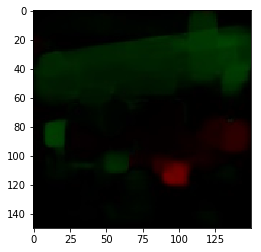

28.106047999999998


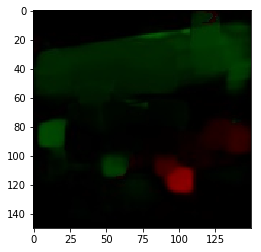

In [54]:
print(flow1speed)
plt.imshow(flow1image)
print(np.max(flow1image))
print(np.min(flow1image))
plt.show()

print(flow2speed)
plt.imshow(flow2image)
plt.show()